# Optimizer
---

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima fount at: 
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


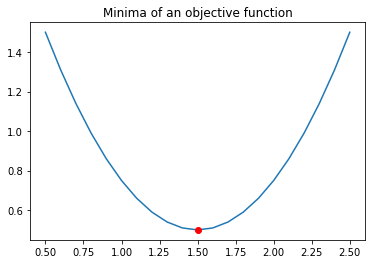

In [3]:
from utils import *
%matplotlib inline
import numpy as np
import scipy.optimize as spo

def f(X):
    """Given a scalar X, return some value (a real number)."""
    Y = (X-1.5)**2+0.5
    print("X = {}, Y = {}".format(X,Y))
    return Y

Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
print("Minima fount at: ")
print("X = {}, Y = {}".format(min_result.x, min_result.fun))

# Plot function values, mark minima
Xplot = np.linspace(0.5,2.5,21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x,min_result.fun,'ro')
plt.title("Minima of an objective function")
plt.show()


Original line: C0: 4.0, C1: 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 163.02269994595076
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0: 3.6404616473954645, C1: 3.7857421285361323


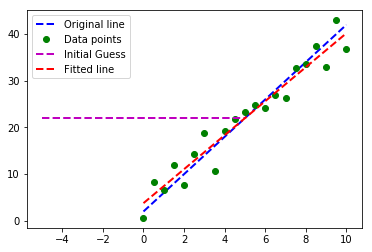

In [5]:
# Fit a line to a given set of data points using optimization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

# error function
def error(line, data):
    err = np.sum((data[:,1] - (line[0]*data[:, 0] + line[1]))**2)
    return err

# fit a line to given data, using a supplied error function
def fit_line(data, error_func):
    # generate initial guess for line model
    l = np.float32([0, np.mean(data[:,1])])
    
    # plot initial guess
    x_ends = np.float32([-5,5])
    plt.plot(x_ends, l[0]*x_ends+l[1], 'm--', linewidth=2.0, label='Initial Guess')
    
    # Call optimizer to minimize error function
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True})
    return result.x
    
# Define original line
l_orig = np.float32([4,2])
print("Original line: C0: {}, C1: {}".format(l_orig[0], l_orig[1]))
Xorig = np.linspace(0,10,21)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
noise =  np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig+noise]).T
plt.plot(data[:,0], data[:,1], 'go', label='Data points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
print("Fitted line: C0: {}, C1: {}".format(l_fit[0], l_fit[1]))
plt.plot(data[:,0], l_fit[0]* data[:,0]+l_fit[1], 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend()
plt.show()